# Feature Engineering

Vamos a trabajar el analisis de sentimientos con una herramienta basica pero efectiva, ya que esto es un MVP y no un producto final.

In [1]:
import Modulo as md
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_parquet('Datasets/parquet/user_reviews.parquet')
df

,user_id,item_id,recommend,review,posted
0,76561197970982479,1250,True,Simple yet with great replayability. In my opi...,"Posted November 5, 2011."
1,76561197970982479,22200,True,It's unique and worth a playthrough.,"Posted July 15, 2011."
2,76561197970982479,43110,True,Great atmosphere. The gunplay can be a bit chu...,"Posted April 21, 2011."
3,js41637,251610,True,I know what you think when you see this title ...,"Posted June 24, 2014."
4,js41637,227300,True,For a simple (it's actually not all that simpl...,"Posted September 8, 2013."
...,...,...,...,...,...
58426,76561198312638244,70,True,a must have classic from steam definitely wort...,Posted July 10.
58427,76561198312638244,362890,True,this game is a perfect remake of the original ...,Posted July 8.
58428,LydiaMorley,273110,True,had so much fun plaing this and collecting res...,Posted July 3.
58429,LydiaMorley,730,True,:D,Posted July 20.


In [3]:
df['sentiment_analysis'] = df['review'].apply(md.sentimientos)
df

,user_id,item_id,recommend,review,posted,sentiment_analysis
0,76561197970982479,1250,True,Simple yet with great replayability. In my opi...,"Posted November 5, 2011.",1
1,76561197970982479,22200,True,It's unique and worth a playthrough.,"Posted July 15, 2011.",2
2,76561197970982479,43110,True,Great atmosphere. The gunplay can be a bit chu...,"Posted April 21, 2011.",1
3,js41637,251610,True,I know what you think when you see this title ...,"Posted June 24, 2014.",1
4,js41637,227300,True,For a simple (it's actually not all that simpl...,"Posted September 8, 2013.",1
...,...,...,...,...,...,...
58426,76561198312638244,70,True,a must have classic from steam definitely wort...,Posted July 10.,2
58427,76561198312638244,362890,True,this game is a perfect remake of the original ...,Posted July 8.,1
58428,LydiaMorley,273110,True,had so much fun plaing this and collecting res...,Posted July 3.,1
58429,LydiaMorley,730,True,:D,Posted July 20.,2


<Axes: xlabel='sentiment_analysis', ylabel='Count'>

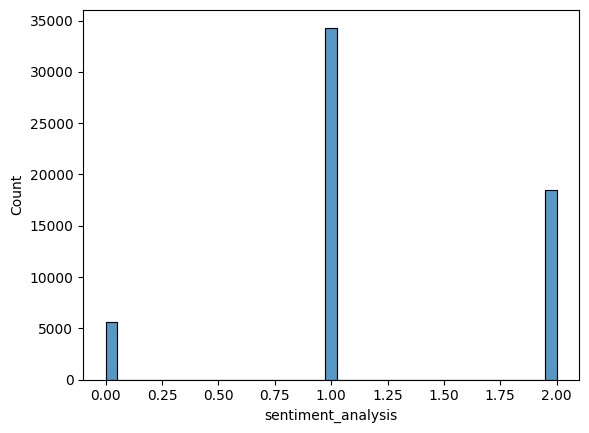

In [4]:
sns.histplot(data=df,x='sentiment_analysis')

In [5]:
df.drop(columns='review',inplace=True)
df

,user_id,item_id,recommend,posted,sentiment_analysis
0,76561197970982479,1250,True,"Posted November 5, 2011.",1
1,76561197970982479,22200,True,"Posted July 15, 2011.",2
2,76561197970982479,43110,True,"Posted April 21, 2011.",1
3,js41637,251610,True,"Posted June 24, 2014.",1
4,js41637,227300,True,"Posted September 8, 2013.",1
...,...,...,...,...,...
58426,76561198312638244,70,True,Posted July 10.,2
58427,76561198312638244,362890,True,Posted July 8.,1
58428,LydiaMorley,273110,True,Posted July 3.,1
58429,LydiaMorley,730,True,Posted July 20.,2


In [6]:
# Agrupa por 'sentiment_analysis' y 'recomendations' y cuenta la cantidad de registros en cada grupo
df_agrupado = df.groupby(['sentiment_analysis', 'recommend']).size().reset_index(name='count')

# Calcula el total de registros
total_records = len(df)

# Calcula el porcentaje
df_agrupado['percentage'] = (df_agrupado['count'] / total_records) * 100

df_agrupado


,sentiment_analysis,recommend,count,percentage
0,0,False,1803,3.085691
1,0,True,3838,6.568431
2,1,False,4262,7.294073
3,1,True,30064,51.452140
4,2,False,674,1.153497
5,2,True,17790,30.446167


Vemos que tiene sentido lo expuesto, ya que la mayor cantidad de sentimientos positivos estan relacionados con usuarios que recomiendan, y en contraposicion, los negativos estan vinculados a la mayor cantidad de usuarios que no recomiendan.

In [ ]:
df.to_parquet('Datasets/parquet/user_reviews_sentiments.parquet',index=False)